In [1]:
# Import packages
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import CSV
full_df = pd.read_csv('medical_clean.csv')

In [3]:
# List columns
full_df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [4]:
# Reduce dataset to necessary columns related to research question
columns = ['Lat', 'Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 'Gender', 
                   'VitD_levels']
df = full_df[columns]

# Check for null values

In [5]:
# Initial check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Lat          10000 non-null  float64
 1   Population   10000 non-null  int64  
 2   Area         10000 non-null  object 
 3   Children     10000 non-null  int64  
 4   Age          10000 non-null  int64  
 5   Income       10000 non-null  float64
 6   Marital      10000 non-null  object 
 7   Gender       10000 non-null  object 
 8   VitD_levels  10000 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 703.2+ KB


In [6]:
# Check for abnormal representations of null values. Also helps with checking for partial duplicates.
for col in columns:
    print(col)
    print(df[col].value_counts(dropna=False))
    print()
    print()

Lat
36.06702    4
33.34798    4
35.25512    4
39.38610    4
37.86890    4
           ..
41.00911    1
39.20560    1
46.36035    1
34.96563    1
40.49998    1
Name: Lat, Length: 8588, dtype: int64


Population
0        109
195       14
115       11
178       11
285       11
        ... 
8092       1
11147      1
27175      1
7371       1
41524      1
Name: Population, Length: 5951, dtype: int64


Area
Rural       3369
Suburban    3328
Urban       3303
Name: Area, dtype: int64


Children
0     2548
1     2509
3     1489
2     1475
4      995
7      213
8      209
6      191
5      169
9      108
10      94
Name: Children, dtype: int64


Age
47    161
52    159
74    159
41    157
86    156
     ... 
63    123
51    122
20    120
36    118
80    116
Name: Age, Length: 72, dtype: int64


Income
14572.40    2
20474.03    2
37132.97    2
29508.62    2
24997.02    2
           ..
41900.29    1
35093.92    1
44848.08    1
20815.96    1
62682.63    1
Name: Income, Length: 9993, dtype: int64


M

# Check for duplicates

In [7]:
# Check for complete duplicates
if df.duplicated().any():
    print('Has complete duplicates')
else:
    print('No complete duplicates')

No complete duplicates


# Check for outliers

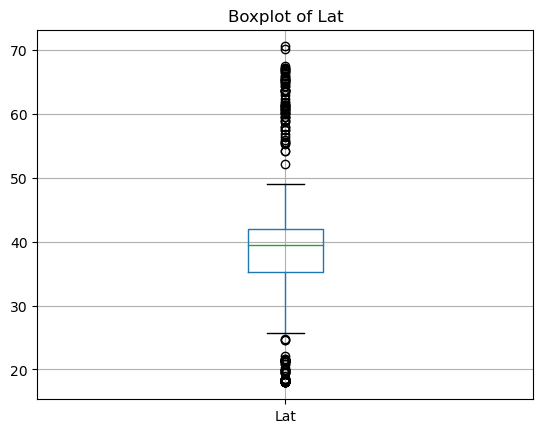

Lat has 150 outliers


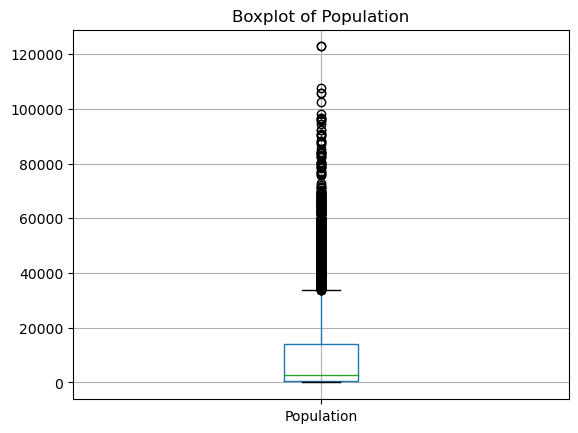

Population has 855 outliers

Value counts for Area
Rural       3369
Suburban    3328
Urban       3303
Name: Area, dtype: int64



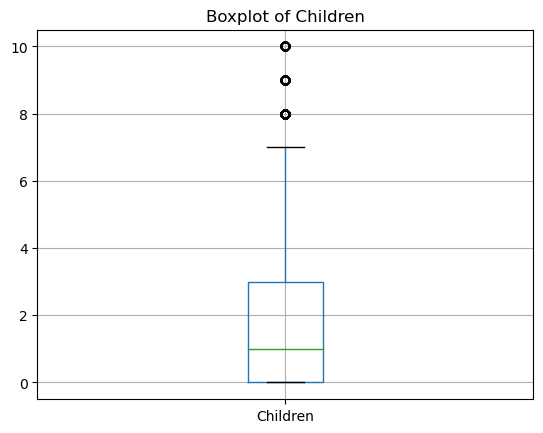

Children has 411 outliers


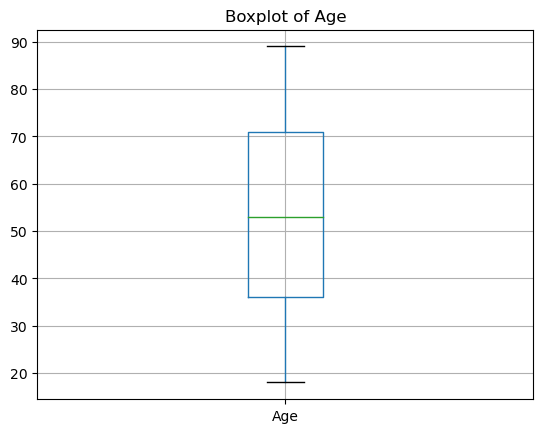

Age has 0 outliers


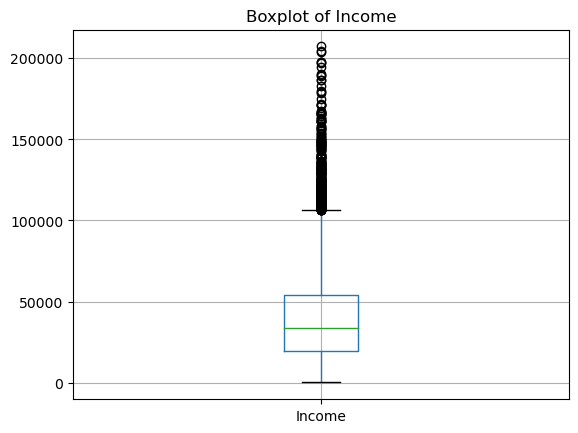

Income has 326 outliers

Value counts for Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: Marital, dtype: int64


Value counts for Gender
Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64



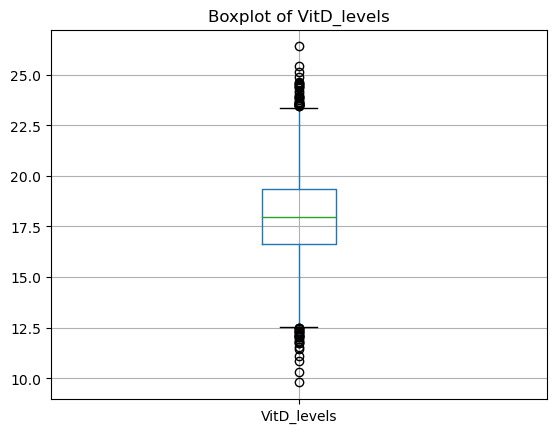

VitD_levels has 60 outliers


In [8]:
# Create boxplot and if outliers exist, calculate using IQR method
for col in columns:
    if df[col].dtype != 'object':
        # Create boxplot
        df.boxplot(column=col)
        plt.title(f'Boxplot of {col}')
        plt.show()
        
        # Calculate IQR lower and upper bounds to determine outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count and display outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        num_outliers = outliers.shape[0]
        print(f"{col} has {num_outliers} outliers")
        
    else:
        # For categorical variables, determine if any category makes up a small percentage
        print()
        print(f'Value counts for {col}')
        print(df[col].value_counts())
        print()

In [10]:
# Remove Outliers
for col in df.columns:
    if df[col].dtype != 'object':
        # Calculate IQR lower and upper bounds to determine outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        num_outliers = outliers.shape[0]
        # Filter out outliers from the DataFrame
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
        # You may want to reset the index after removing rows
        df.reset_index(drop=True, inplace=True)

df['Gender'].value_counts()       

df.info()

In [14]:
df = df[df['Gender'] != 'Nonbinary']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8136 entries, 0 to 8301
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Lat          8136 non-null   float64
 1   Population   8136 non-null   int64  
 2   Area         8136 non-null   object 
 3   Children     8136 non-null   int64  
 4   Age          8136 non-null   int64  
 5   Income       8136 non-null   float64
 6   Marital      8136 non-null   object 
 7   Gender       8136 non-null   object 
 8   VitD_levels  8136 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 635.6+ KB


# Summary Statistics

In [16]:
# Produce summary statistics for each variable
for col in columns:
    print(f'Summary statistics for {col}')
    print(df[col].describe())
    print()

Summary statistics for Lat
count    8136.000000
mean       38.966071
std         4.681918
min        25.720520
25%        35.764075
50%        39.632850
75%        42.184760
max        48.988170
Name: Lat, dtype: float64

Summary statistics for Population
count     8136.000000
mean      6295.453786
std       8338.794972
min          0.000000
25%        618.500000
50%       2200.000000
75%       8730.750000
max      33420.000000
Name: Population, dtype: float64

Summary statistics for Area
count      8136
unique        3
top       Rural
freq       2774
Name: Area, dtype: object

Summary statistics for Children
count    8136.000000
mean        1.812807
std         1.700063
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         7.000000
Name: Children, dtype: float64

Summary statistics for Age
count    8136.000000
mean       53.582350
std        20.575383
min        18.000000
25%        36.000000
50%        53.000000
75%        71.000000
max      

# Univariate Visualizations

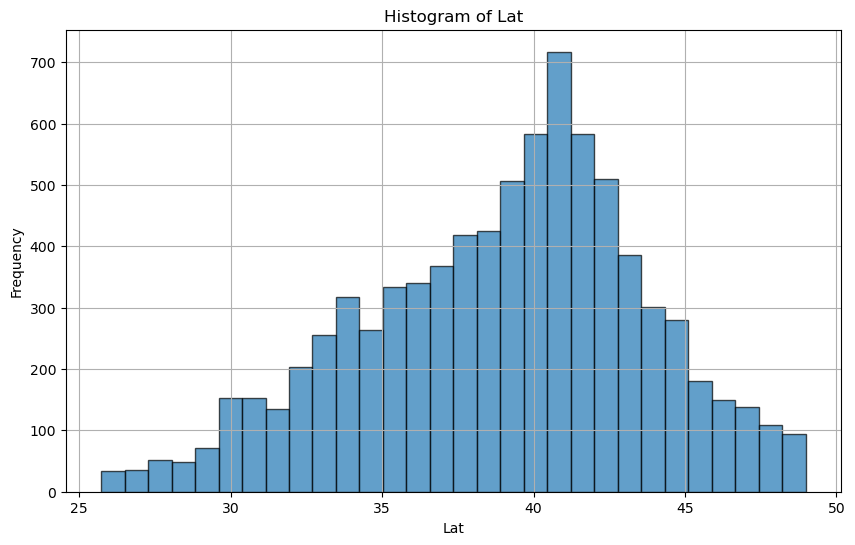

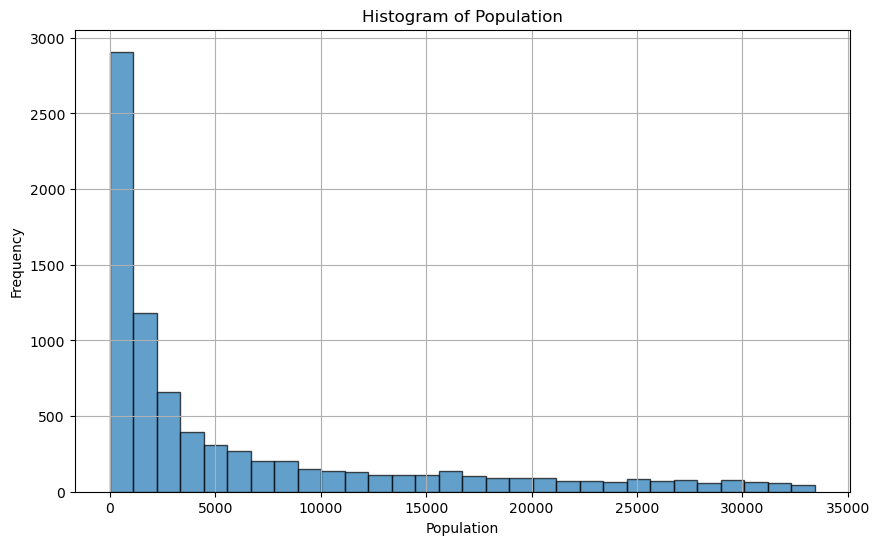

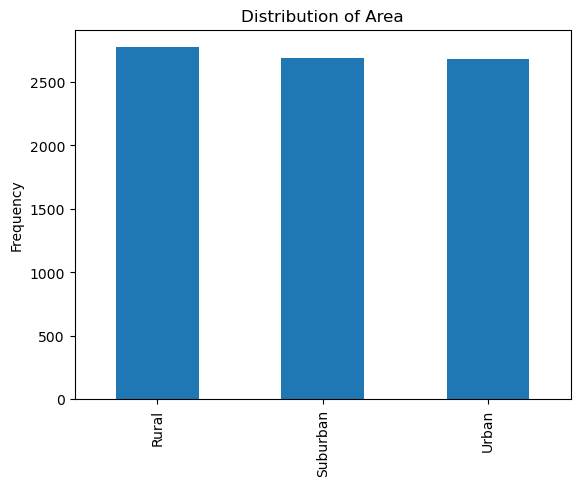

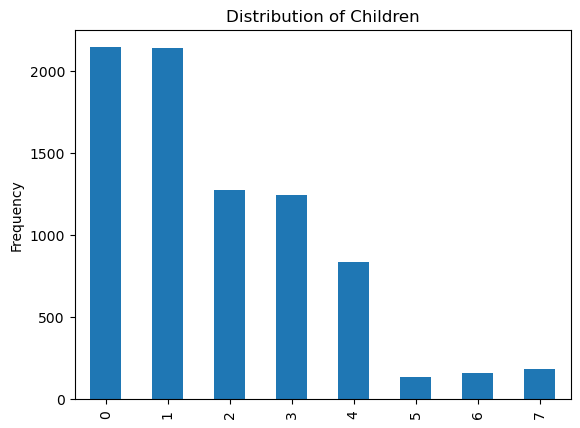

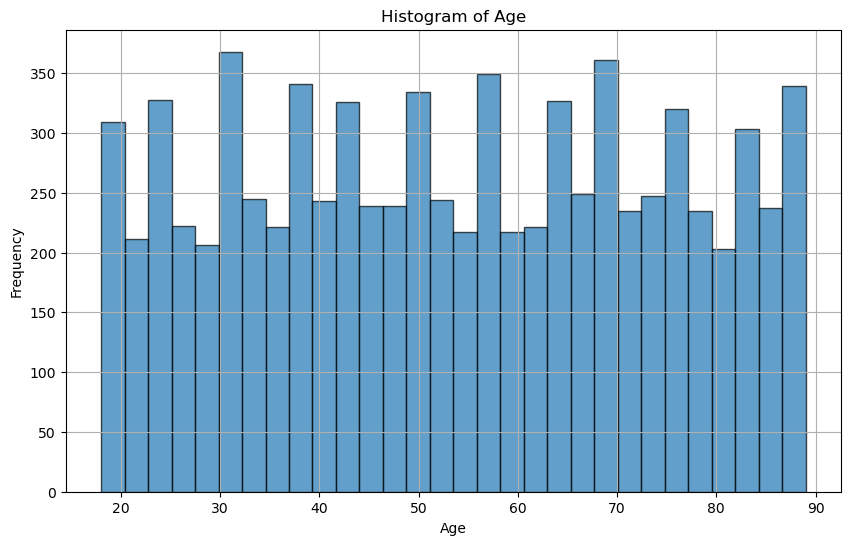

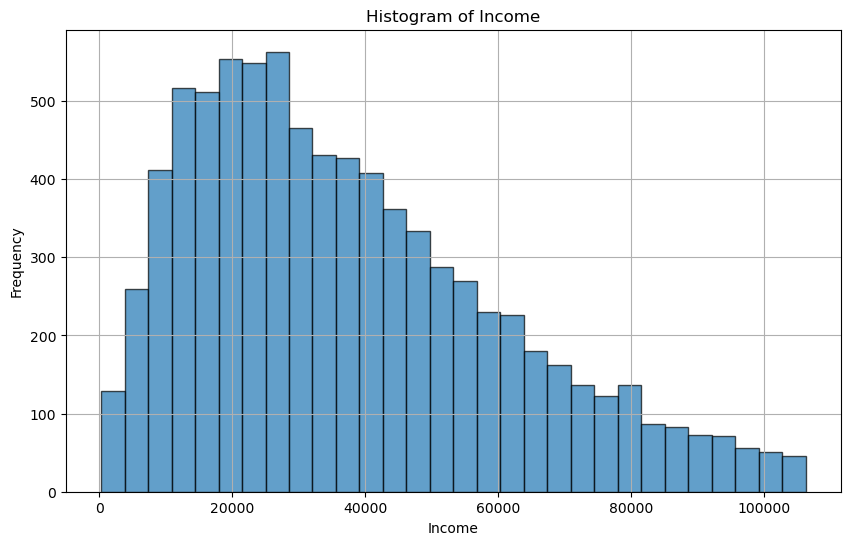

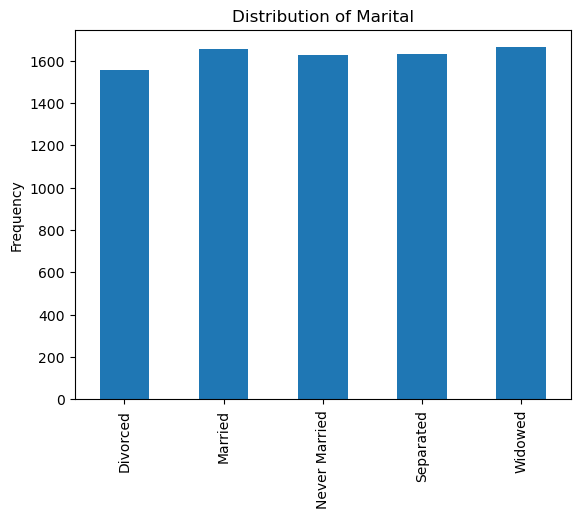

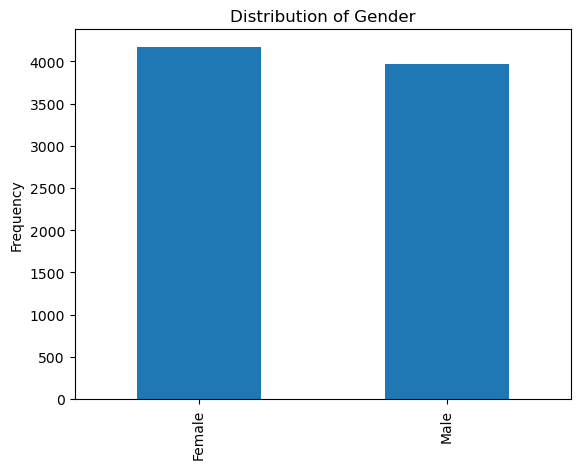

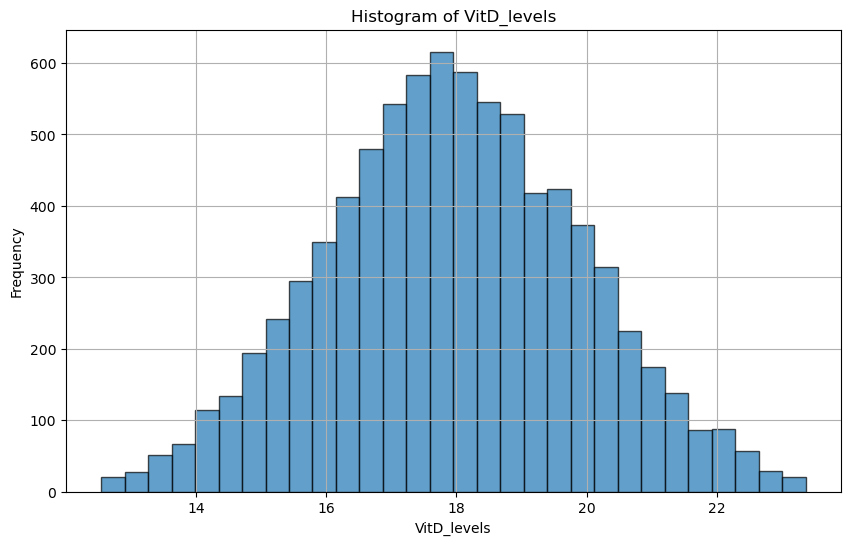

In [17]:
# Create univariate visualizations for each variable
for col in columns:
    if (df[col].dtype != 'object') & (col != 'Children'):
        plt.figure(figsize=(10, 6))
        plt.hist(df[col], bins=30, edgecolor='k', alpha=0.7)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    else:
        value_counts = df[col].value_counts().sort_index()
        value_counts.plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.ylabel('Frequency')
        plt.show()

# Bivariate Visualizations

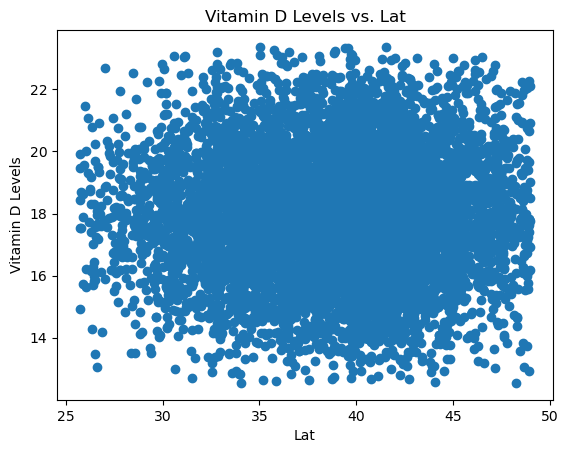

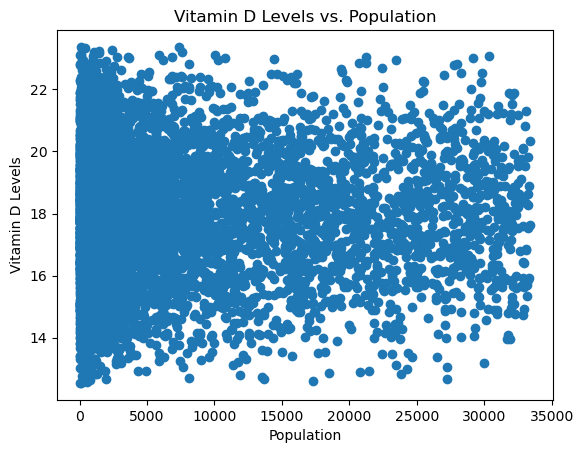

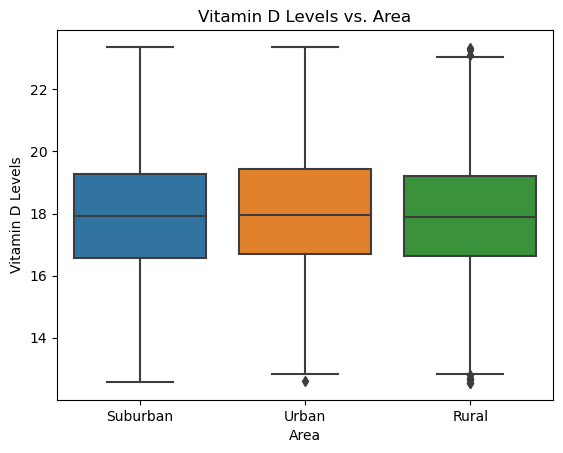

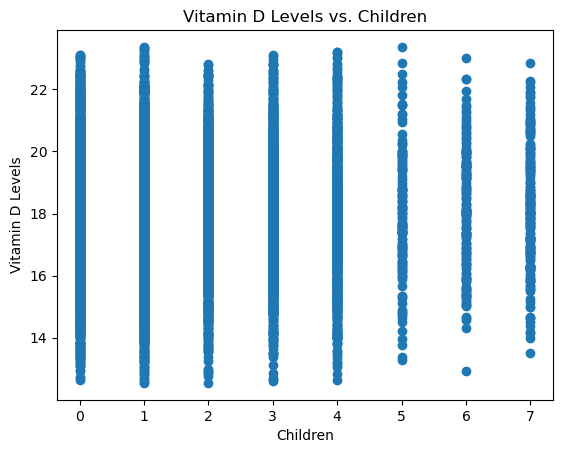

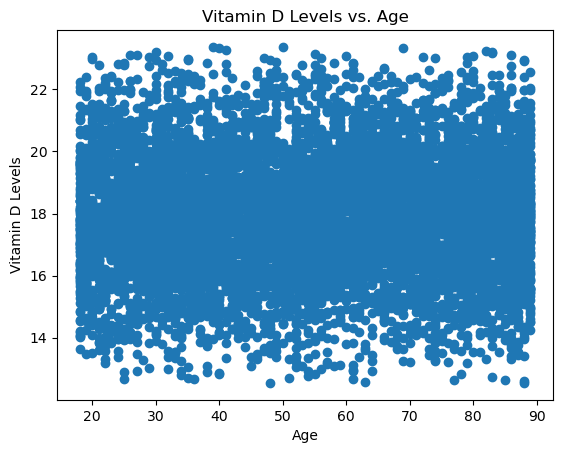

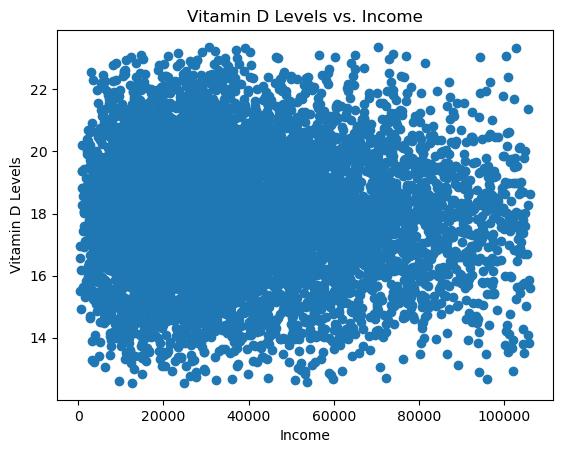

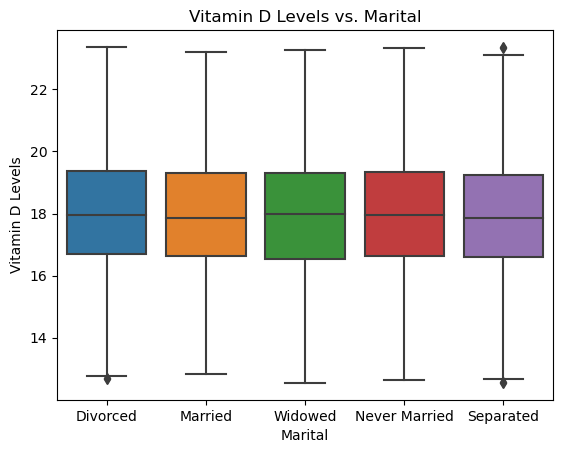

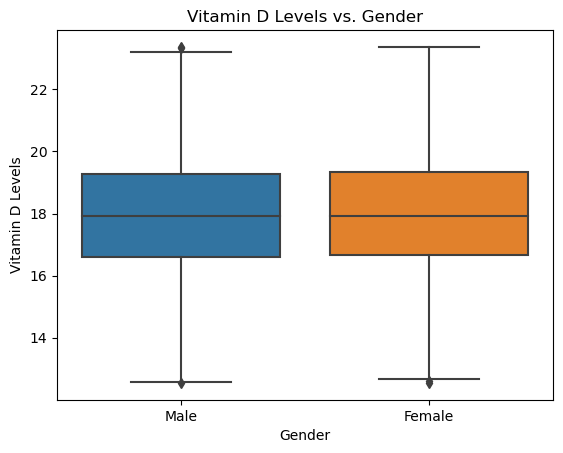

In [18]:
# Create bivariate visualizations for each dependent/independent variable combination
for col in columns:
    if col != 'VitD_levels':
        # Scatterplot if continuous vs. continuous
        if df[col].dtype != 'object':
            plt.scatter(df[col], df['VitD_levels'])
            plt.title(f'Vitamin D Levels vs. {col}')
            plt.xlabel(col)
            plt.ylabel('Vitamin D Levels')
            plt.show()
        # Boxplot if continuous vs. categorical
        else:
            sns.boxplot(x=col, y='VitD_levels', data=df)
            plt.title(f'Vitamin D Levels vs. {col}')
            plt.ylabel('Vitamin D Levels')
            plt.show()

# Modeling

In [19]:
# Initial model to check Vitamin D Levels against all identified explanatory variables.
mdl_vitd_vs_all = ols(f'VitD_levels ~ Lat + Population + Area + Children + Age + Income + Marital + Gender + 0', data=df).fit()
mdl_vitd_vs_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            VitD_levels   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.415
Date:                Tue, 20 Feb 2024   Prob (F-statistic):              0.151
Time:                        11:58:42   Log-Likelihood:                -17009.
No. Observations:                8136   AIC:                         3.404e+04
Df Residuals:                    8123   BIC:                         3.414e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Area[Rural]                 17.7383      0.210     84.325      0.000      17.326      18.151
Area[Suburban]              17.7513      0.210     84.620      0.000      17.340      18.163
Area[Urban]                 17.8636      0.210     85.089      0.000      17.452      18.275
Marital[T.Married]          -0.0080      0.069     -0.116      0.908      -0.144       0.128
Marital[T.Never Married]     0.0012      0.069      0.017      0.987      -0.135       0.137
Marital[T.Separated]        -0.0355      0.069     -0.511      0.609      -0.172       0.101
Marital[T.Widowed]          -0.0417      0.069     -0.603      0.546      -0.177       0.094
Gender[T.Male]              -0.0587      0.043     -1.350      0.177      -0.144       0.027
Lat                          0.0052      0.005      1.114      0.265      -0.004       0.014
Population               -4.923e-07   2.64e-06     -0.187      0.852   -5.67e-06    4.68e-06
Children                     0.0112      0.013      0.872      0.383      -0.014       0.036
Age                          0.0011      0.001      1.061      0.289      -0.001       0.003
Income                   -1.978e-06    9.3e-07     -2.126      0.034    -3.8e-06   -1.54e-07
==============================================================================
Omnibus:                       38.382   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.436
Skew:                           0.022   Prob(JB):                     6.69e-07
Kurtosis:                       2.714   Cond. No.                     7.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

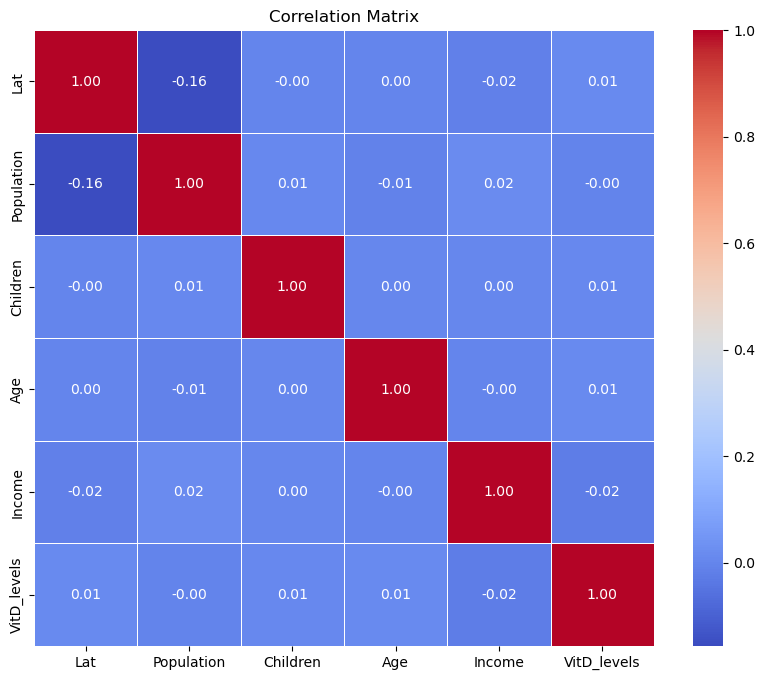

In [20]:
# Correlation matrix to check for multicollinearity
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [21]:
# Reduced model eliminating Lat
mdl_vitd_v2 = ols(f'VitD_levels ~ Population + Area + Children + Age + Income + Marital + Gender + 0', data=df).fit()
mdl_vitd_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            VitD_levels   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.431
Date:                Tue, 20 Feb 2024   Prob (F-statistic):              0.151
Time:                        11:58:42   Log-Likelihood:                -17010.
No. Observations:                8136   AIC:                         3.404e+04
Df Residuals:                    8124   BIC:                         3.413e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Area[Rural]                 17.9471      0.095    188.192      0.000      17.760      18.134
Area[Suburban]              17.9590      0.096    186.896      0.000      17.771      18.147
Area[Urban]                 18.0719      0.095    189.865      0.000      17.885      18.259
Marital[T.Married]          -0.0081      0.069     -0.117      0.907      -0.144       0.128
Marital[T.Never Married]     0.0009      0.069      0.013      0.989      -0.135       0.137
Marital[T.Separated]        -0.0371      0.069     -0.535      0.593      -0.173       0.099
Marital[T.Widowed]          -0.0428      0.069     -0.619      0.536      -0.178       0.093
Gender[T.Male]              -0.0591      0.043     -1.360      0.174      -0.144       0.026
Population               -9.513e-07   2.61e-06     -0.365      0.715   -6.06e-06    4.16e-06
Children                     0.0112      0.013      0.872      0.383      -0.014       0.036
Age                          0.0011      0.001      1.060      0.289      -0.001       0.003
Income                   -1.992e-06    9.3e-07     -2.141      0.032   -3.82e-06   -1.68e-07
==============================================================================
Omnibus:                       38.613   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.580
Skew:                           0.022   Prob(JB):                     6.22e-07
Kurtosis:                       2.713   Cond. No.                     3.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# Reduced model eliminating Lat, Population
mdl_vitd_v3 = ols(f'VitD_levels ~ Area + Children + Age + Income + Marital + Gender + 0', data=df).fit()
mdl_vitd_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            VitD_levels   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.561
Date:                Tue, 20 Feb 2024   Prob (F-statistic):              0.112
Time:                        11:58:42   Log-Likelihood:                -17010.
No. Observations:                8136   AIC:                         3.404e+04
Df Residuals:                    8125   BIC:                         3.412e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Area[Rural]                 17.9416      0.094    190.540      0.000      17.757      18.126
Area[Suburban]              17.9530      0.095    189.666      0.000      17.767      18.139
Area[Urban]                 18.0663      0.094    192.396      0.000      17.882      18.250
Marital[T.Married]          -0.0084      0.069     -0.122      0.903      -0.144       0.127
Marital[T.Never Married]     0.0009      0.069      0.012      0.990      -0.135       0.137
Marital[T.Separated]        -0.0373      0.069     -0.537      0.591      -0.173       0.099
Marital[T.Widowed]          -0.0428      0.069     -0.620      0.535      -0.178       0.093
Gender[T.Male]              -0.0594      0.043     -1.366      0.172      -0.145       0.026
Children                     0.0111      0.013      0.871      0.384      -0.014       0.036
Age                          0.0011      0.001      1.065      0.287      -0.001       0.003
Income                   -1.998e-06    9.3e-07     -2.148      0.032   -3.82e-06   -1.75e-07
==============================================================================
Omnibus:                       38.599   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.567
Skew:                           0.022   Prob(JB):                     6.26e-07
Kurtosis:                       2.713   Cond. No.                     3.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# Reduced model eliminating Lat, Population, Marital
mdl_vitd_v4 = ols(f'VitD_levels ~ Area + Children + Age + Income + Gender + 0', data=df).fit()
mdl_vitd_v4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            VitD_levels   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.478
Date:                Tue, 20 Feb 2024   Prob (F-statistic):             0.0214
Time:                        11:58:42   Log-Likelihood:                -17011.
No. Observations:                8136   AIC:                         3.404e+04
Df Residuals:                    8129   BIC:                         3.408e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Area[Rural]       17.9234      0.082    217.378      0.000      17.762      18.085
Area[Suburban]    17.9353      0.083    215.144      0.000      17.772      18.099
Area[Urban]       18.0486      0.082    219.056      0.000      17.887      18.210
Gender[T.Male]    -0.0591      0.043     -1.360      0.174      -0.144       0.026
Children           0.0112      0.013      0.875      0.382      -0.014       0.036
Age                0.0011      0.001      1.059      0.289      -0.001       0.003
Income         -1.993e-06    9.3e-07     -2.143      0.032   -3.81e-06    -1.7e-07
==============================================================================
Omnibus:                       38.558   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.550
Skew:                           0.022   Prob(JB):                     6.32e-07
Kurtosis:                       2.713   Cond. No.                     2.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Reduced model eliminating Lat, Population, Marital, Gender
mdl_vitd_v5 = ols(f'VitD_levels ~ Area + Children + Age + Income + 0', data=df).fit()
mdl_vitd_v5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            VitD_levels   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.604
Date:                Tue, 20 Feb 2024   Prob (F-statistic):             0.0233
Time:                        11:58:42   Log-Likelihood:                -17011.
No. Observations:                8136   AIC:                         3.403e+04
Df Residuals:                    8130   BIC:                         3.408e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Area[Rural]       17.8937      0.080    225.066      0.000      17.738      18.050
Area[Suburban]    17.9058      0.081    222.407      0.000      17.748      18.064
Area[Urban]       18.0191      0.079    226.693      0.000      17.863      18.175
Children           0.0113      0.013      0.887      0.375      -0.014       0.036
Age                0.0011      0.001      1.070      0.285      -0.001       0.003
Income         -1.995e-06    9.3e-07     -2.146      0.032   -3.82e-06   -1.73e-07
==============================================================================
Omnibus:                       37.690   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.995
Skew:                           0.022   Prob(JB):                     8.34e-07
Kurtosis:                       2.716   Cond. No.                     2.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# Reduced model eliminating Lat, Population, Marital, Gender, Children
mdl_vitd_v6 = ols(f'VitD_levels ~ Area + Age + Income + 0', data=df).fit()
mdl_vitd_v6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            VitD_levels   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.059
Date:                Tue, 20 Feb 2024   Prob (F-statistic):             0.0157
Time:                        11:58:42   Log-Likelihood:                -17012.
No. Observations:                8136   AIC:                         3.403e+04
Df Residuals:                    8131   BIC:                         3.407e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Area[Rural]       17.9142      0.076    235.503      0.000      17.765      18.063
Area[Suburban]    17.9268      0.077    232.900      0.000      17.776      18.078
Area[Urban]       18.0390      0.076    236.502      0.000      17.889      18.188
Age                0.0011      0.001      1.071      0.284      -0.001       0.003
Income         -1.994e-06    9.3e-07     -2.144      0.032   -3.82e-06   -1.71e-07
==============================================================================
Omnibus:                       37.381   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.805
Skew:                           0.022   Prob(JB):                     9.17e-07
Kurtosis:                       2.717   Cond. No.                     2.47e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Reduced model eliminating Lat, Population, Marital, Gender, Children, Age
mdl_vitd_v7 = ols(f'VitD_levels ~ Area + Income + 0', data=df).fit()
mdl_vitd_v7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            VitD_levels   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.696
Date:                Tue, 20 Feb 2024   Prob (F-statistic):             0.0113
Time:                        11:58:43   Log-Likelihood:                -17012.
No. Observations:                8136   AIC:                         3.403e+04
Df Residuals:                    8132   BIC:                         3.406e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Area[Rural]       17.9747      0.051    353.123      0.000      17.875      18.075
Area[Suburban]    17.9881      0.051    349.508      0.000      17.887      18.089
Area[Urban]       18.0990      0.052    350.377      0.000      17.998      18.200
Income         -1.995e-06    9.3e-07     -2.146      0.032   -3.82e-06   -1.73e-07
==============================================================================
Omnibus:                       37.641   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.971
Skew:                           0.022   Prob(JB):                     8.44e-07
Kurtosis:                       2.716   Cond. No.                     1.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
# Final model with just Area
mdl_vitd_v8 = ols(f'VitD_levels ~ Area', data=df).fit()
mdl_vitd_v8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            VitD_levels   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.239
Date:                Tue, 20 Feb 2024   Prob (F-statistic):             0.0393
Time:                        11:58:43   Log-Likelihood:                -17015.
No. Observations:                8136   AIC:                         3.404e+04
Df Residuals:                    8133   BIC:                         3.406e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           17.9001      0.037    481.207      0.000      17.827      17.973
Area[T.Suburban]     0.0130      0.053      0.244      0.807      -0.091       0.117
Area[T.Urban]        0.1235      0.053      2.326      0.020       0.019       0.228
==============================================================================
Omnibus:                       37.868   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.108
Skew:                           0.022   Prob(JB):                     7.88e-07
Kurtosis:                       2.715   Cond. No.                         3.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# More Visualizations

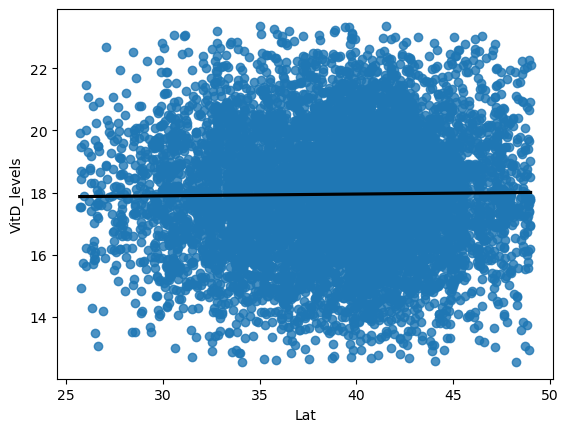

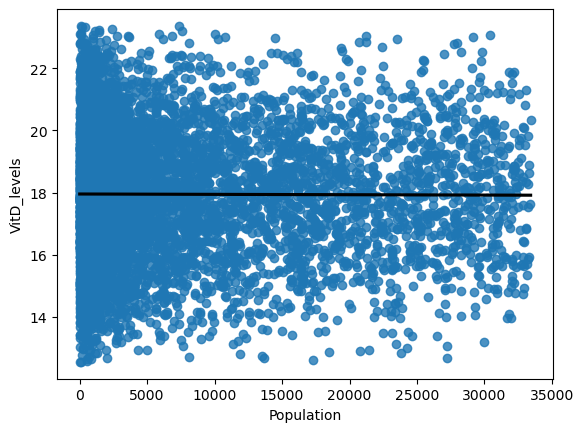

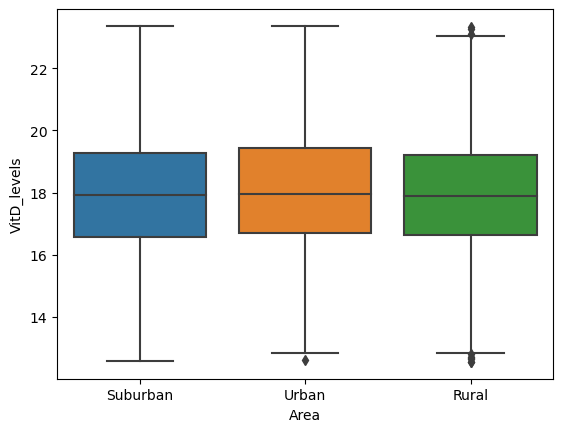

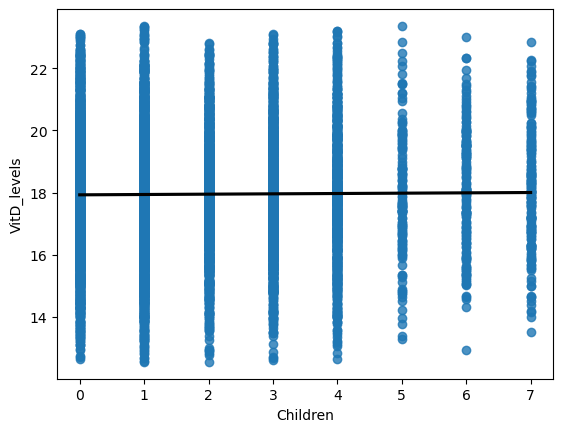

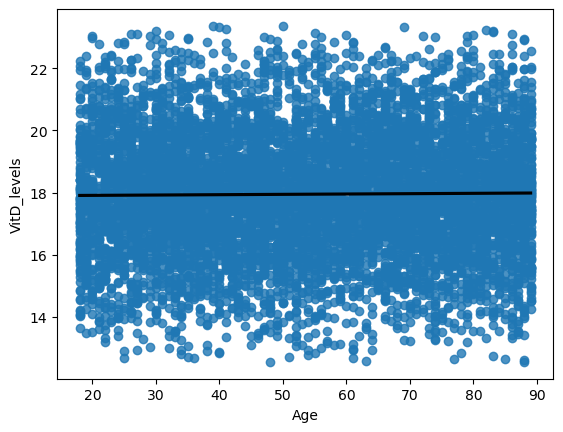

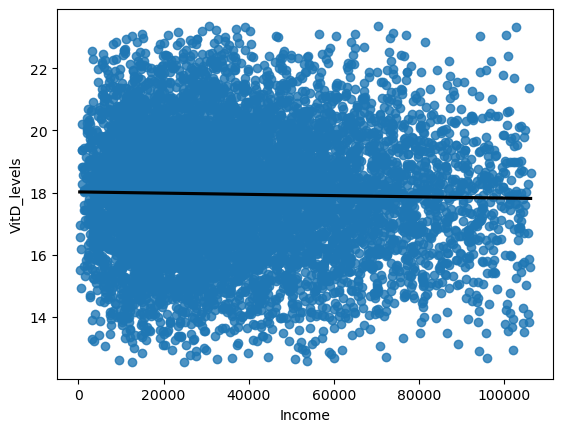

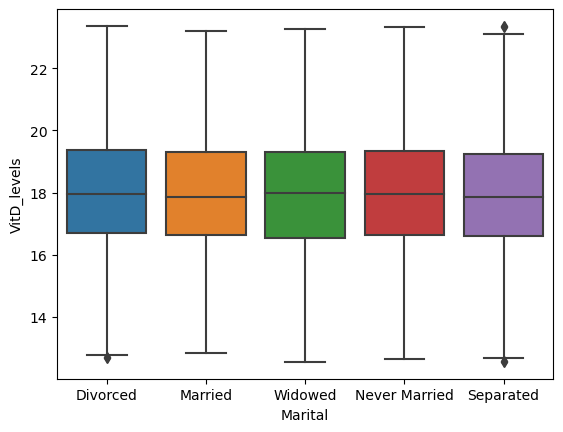

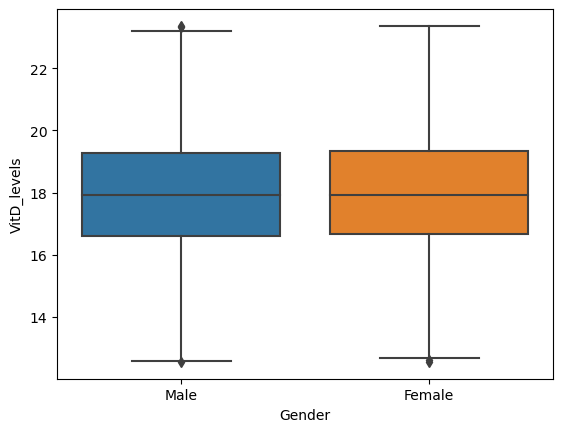

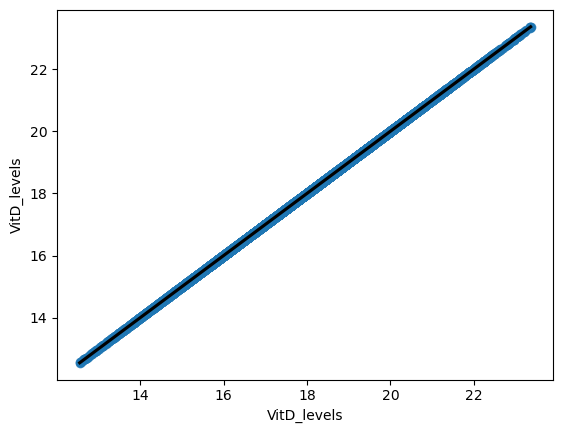

In [28]:
for col in columns:
    if df[col].dtype != 'object':
        sns.regplot(x=col, y='VitD_levels', data=df, ci=None, line_kws={'color':'black'})
        plt.show()
    else:
        sns.boxplot(x=col, y='VitD_levels', data=df)
        plt.show()